In [16]:
############ Q1 Binary Sequences with No Adjacent 1s Metropolis_Hastings ##############
# original state is '0'*m
import random
import numpy as np
# coin that lands head with prob=a_{ij}
def int2bin(n, count):
    return "".join([str((n >> y) & 1) for y in range(count-1, -1, -1)])

def good_seq_acceptance(state,states):
    if state in states:
        return 1
    return 0

def Metropolis_Hastings(X0,m,states,distri):
    output=np.array([0]*len(states))
    X=X0
    iters=10000
    for t in range(iters):
#         switch_bit=np.random.random_integers(m)-1
        switch_bit=np.random.randint(1, 4 + 1)-1
        nextState=X[:]
        # print(nextState)
        nextState[switch_bit]=str(1-int(nextState[switch_bit]))
        aij=good_seq_acceptance(nextState,states)
        # print(aij)
        if aij==1:#i.e.flip coin must be 1
            X=nextState
        idx=states.index(X)
        output[idx]+=1
    return output/sum(output)

m=4
states=[]
counts1=[]
for i in range(2**m):
    seq=int2bin(i,m)
    flag=1
    for j in range(1,m):
        if seq[j]=='1' and seq[j-1]=='1':
            flag=0
            break
    if flag==1:
        counts1.append(seq.count('1'))
        states.append(list(seq))
# print(states)
distri=[1/len(states)]*len(states)
# states=['1010','1000','0010','1001','0000','0001','0100','0101']
output=Metropolis_Hastings(list('0'*m),m,states,distri)
sum1=0
for i in range(len(output)):
    sum1+=counts1[i]*output[i]
# print(output)
print('expected number of 1s in a good sequence: ',sum1)

expected number of 1s in a good sequence:  1.2459


In [26]:
############ Q2 power-law Metropolis_Hastings ##############
import random
import numpy as np
# coin that lands head with prob=a_{ij}
def coin(p):
    flip=random.random()
    if flip < p:
        return 1
    return 0

def power_law_distri(i,s):
    sumk=0
    for k in range(1,5001):
        sumk+=k**(s)
    return i**(s)/sumk

def power_law_acceptance(i,j,s):
    compare=power_law_distri(j,s)*power_law_trans(j,i)/(power_law_distri(i,s)*power_law_trans(i,j))
    if compare<1:
        return compare
    return 1

def power_law_trans(i,j):
    if i==1 and j==2:
        return 1
    elif j==i+1 or j==i-1:
        return 0.5
    else:
        return 0

def Metropolis_Hastings(X0,s):
    output=np.array([0]*9)
    X=X0
    iters=20000
    for t in range(iters):
        if X==1:
            nextState=2
        else:
            chooseState=random.random()
            if chooseState>0.5:
                nextState=X+1
            else:
                nextState=X-1
        aij=power_law_acceptance(X,nextState,s)
        if coin(aij)==1:
            X=nextState
        if X>9:
            output[8]+=1
        else:
            output[X-1]+=1
    print('simulated power-law distributions',output/sum(output))
    
Metropolis_Hastings(5,-1.5)

simulated power-law distributions [0.4196  0.1482  0.07935 0.0519  0.03665 0.03025 0.0228  0.0183  0.19295]


In [11]:
############ Q3 Knapsack Problem ##############
import random
import numpy as np
from math import exp
def int2bin(n, count):
    return "".join([str((n >> y) & 1) for y in range(count-1, -1, -1)])

def V_x(x,worth_vec,m):
    sumv=0
    for j in range(m):
        sumv+=x[j]*worth_vec[j]
    return sumv

def knapsack_acceptance(curstate,nstate,states,beta):
    if nstate not in states:
        return 0
    compare=exp(beta*(V_x(nstate,worth_vec,m)-V_x(curstate,worth_vec,m)))
    if compare<1:
        return compare
    return 1

def Metropolis_Hastings(X0,m,states):
    output=np.array([0]*len(states))
    X=X0
    iters=10000
    for t in range(iters):
        # beta=(t+1)/30
        beta=10
        switch_bit=np.random.randint(m)-1
        nextState=X[:]
        # print(nextState)
        nextState[switch_bit]=1-nextState[switch_bit]
        aij=knapsack_acceptance(X,nextState,states,beta)
        # print(aij)
        if aij==1:#i.e.flip coin must be 1
            X=nextState
        idx=states.index(X)
        output[idx]+=1
    return output/sum(output)

m=5 # trasure label
w=10 # maximum weight
worth_vec=np.array([6,3,5,4,6])
weight_vec=np.array([2,2,6,5,4])

states=[]
total_weight=[]
for i in range(2**m):
    x=list(int2bin(i,m))
    for j in range(len(x)):
        x[j]=int(x[j])
    np_x=np.array(x)
    total_w=sum(np_x*weight_vec)
    if total_w<=w:
        total_weight.append(total_w)
        states.append(x)
output=Metropolis_Hastings([0]*m,m,states)
# idx=output.index(max(output))
idx=np.where(output==max(output))[0][0]
maxWorth=sum(np.array(states[idx])*worth_vec)
print('maximization of the total worth of the treasure: ',maxWorth)

maximization of the total worth of the treasure:  15


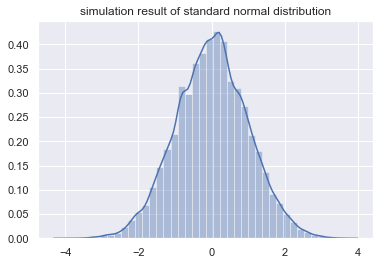

In [15]:
############ Q4 Standard Normal Distribution: Metropolis_Hastings ##############
import random
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
def coin(p):
    flip=random.random()
    if flip < p:
        return 1
    return 0

def probVal(state):
    return exp(-0.5*state*state)

def Metropolis_Hastings(X0):
    allStates=[]
    X=X0
    iters=100000
    for t in range(iters):
        allStates.append(X)
        nextState=np.random.uniform(-10,10)
        aij=probVal(nextState)/probVal(X)
        # print(aij)
        if coin(aij)==1:
            X=nextState
    return allStates

origin=np.random.uniform(-10,10)
sample=Metropolis_Hastings(origin)
sns.set(color_codes=True)
sns.distplot(sample,bins=40)
plt.title('simulation result of standard normal distribution')
plt.show()

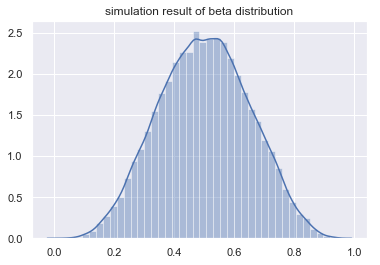

In [3]:
############ Q5 Beta Distribution: Metropolis_Hastings ##############
import random
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

def coin(p):
    flip=random.random()
    if flip < p:
        return 1
    return 0

def beta_acceptance(curstate,nstate):
    nextval=nstate**(a-1)*((1-nstate)**(b-1))
    curval=curstate**(a-1)*((1-curstate)**(b-1))
    compare=nextval/curval
    if compare<1:
        return compare
    return 1

def Metropolis_Hastings(X0,a,b):
    allStates=[]
    X=X0
    iters=100000
    for t in range(iters):
        nextState=random.uniform(0, 1)
        aij=beta_acceptance(X,nextState)
        # print(aij)
        if coin(aij)==1:
            X=nextState
        allStates.append(X)
    return allStates

a=5
b=5
origin = random.uniform(0, 1)
sample=Metropolis_Hastings(origin,a,b)
sns.set(color_codes=True)
sns.distplot(sample,bins=40)
plt.title('simulation result of beta distribution')
plt.show()

In [28]:
############ Q6 Normal-normal conjugacy Distribution: Metropolis_Hastings ##############
import random
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns

def coin(p):
    flip=random.random()
    if flip < p:
        return 1
    return 0
def postval(state):
    a=exp(0-1/(2*sigma_square)*(Y-state)**2)
    b=exp(0-1/(2*tao_square)*(state-mu)**2)
    return a*b

def NN_acceptance(curstate,nstate):
    compare=postval(nstate)/postval(curstate)
    if compare<1:
        return compare
    return 1

def Metropolis_Hastings(X0,d):
    allStates=[]
    X=X0
    iters=100000
    for t in range(iters):
        epsn=np.random.normal(0,d**2)
        nextState=X+epsn
        aij=NN_acceptance(X,nextState)
        # print(aij)
        if coin(aij)==1:
            X=nextState
        allStates.append(X)
    return allStates
Y=3
mu=0
sigma_square=1
tao_square=4
origin=random.uniform(mu,1)
d_arr=[0.1,0.5,1,5,10,100]
for d in d_arr:
    sample=Metropolis_Hastings(origin,d)
    print('when d=',d,', mean:',np.mean(sample),'var',np.var(sample))

when d= 0.1 , mean: 1.4916402966126963 var 0.4572452397364691
when d= 0.5 , mean: 2.3954278188005844 var 0.8185654938318465
when d= 1 , mean: 2.4016053089985623 var 0.7995490719358507
when d= 5 , mean: 2.4026001536057207 var 0.7861694325036873
when d= 10 , mean: 2.444683251360513 var 0.7542665821390588
when d= 100 , mean: 2.317582989379096 var 0.4676983217107526


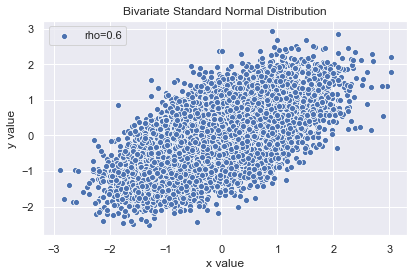

In [5]:
############ Q7 Bivariate Standard Normal Distribution: Systematic Scan Gibbs Sampler##############
import numpy as np
import pandas as pd
from math import exp,pi,sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

def symmetri_Gibbs(xpos,ypos):
    variance=1-rho**2
    iter=10000
    for t in range(iter):
        x_next=np.random.normal(rho*ypos[t],variance)
        xpos.append(x_next)
        y_next=np.random.normal(rho*xpos[t+1],variance)
        ypos.append(y_next)

rho=0.6
xpos=[0]
ypos=[0]
symmetri_Gibbs(xpos,ypos)
# print(len(xpos))

resdf=pd.DataFrame({'x':xpos,'y':ypos})
sns.scatterplot(x="x", y="y",data=resdf)
plt.title('Bivariate Standard Normal Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend(['rho=0.6'])
plt.tight_layout()
plt.savefig('BivariateNormal.jpg')
plt.show()

Gibbs Sampler:	mean: 0.6808011929754648 var 0.03207152144877267
Metropolis Hastings:	mean: 0.6853309170492695 var 0.03196158912271406


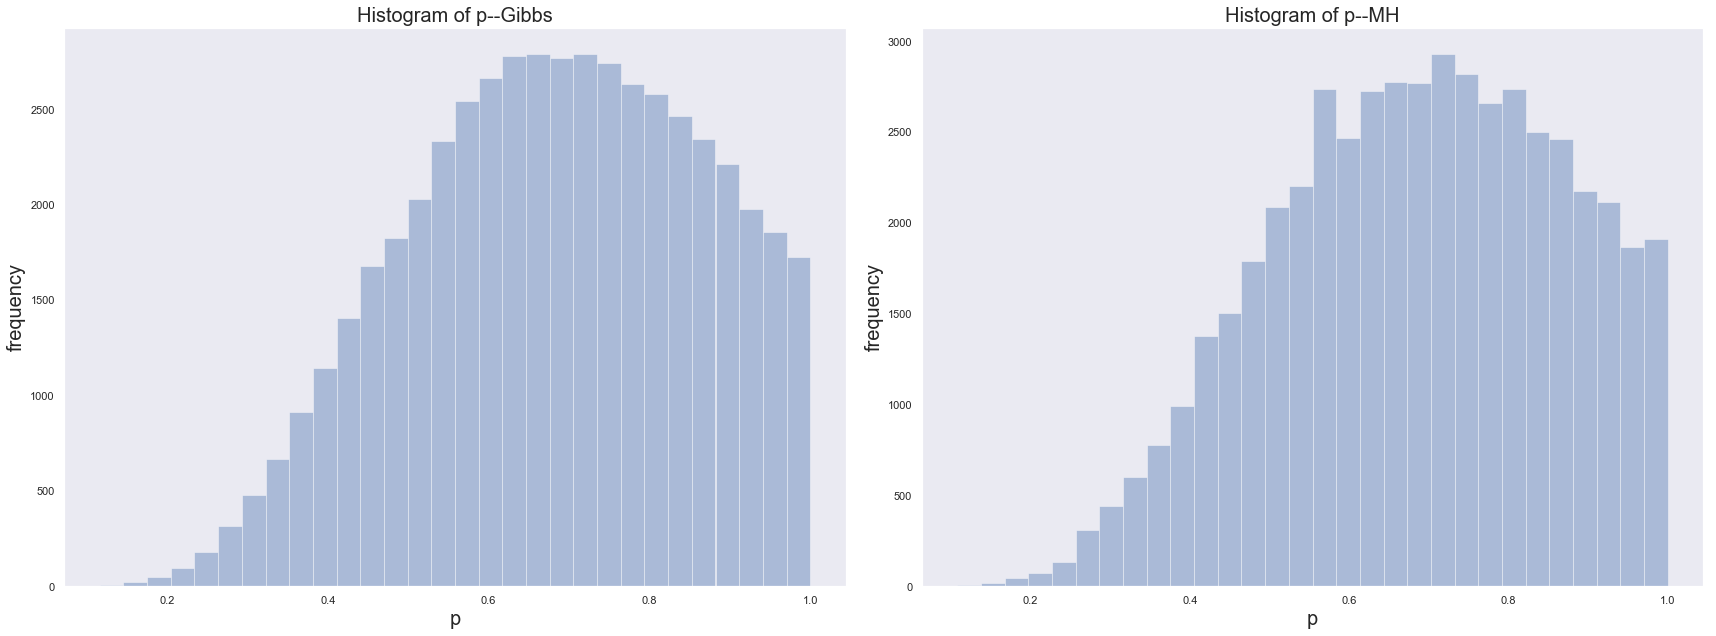

In [4]:
############ Q8 Chicken-Egg with Unknown Parameters: Gibbs Sampler ##############
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
import random
sns.set(color_codes=True)

def coin(p):
    flip=random.random()
    if flip < p:
        return 1
    return 0

def plot_hist(allpG,allpMH):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 9))
    ax1.grid()
    sns.distplot(a = allpG, bins = 30,ax=ax1,kde=False)
    # ax1.axhline(y=0, color='r', linewidth=4) 
    ax1.set_title("Histogram of p--Gibbs",fontsize=20)
    ax1.set_xlabel("p",fontsize=20)
    ax1.set_ylabel("frequency",fontsize=20)

    ax2.grid()
    sns.distplot(a = allpMH, bins =30,ax=ax2,kde=False)
    ax2.set_title("Histogram of p--MH",fontsize=20)
    ax2.set_xlabel("p",fontsize=20)
    ax2.set_ylabel("frequency",fontsize=20)
    plt.tight_layout()
    plt.savefig('imgq8.jpg')
    plt.show()

def gibbs_sample(n,p,a,b,lam,x):
    iters=50000
    for t in range(iters):
        allp.append(p)
        allN.append(n)
        p=np.random.beta(x+a,n-x+b)
        y=np.random.poisson(lam*(1-p))
        n=x+y
    return allp

def MH_sample(p,a,b,lam,x):
    res=exp(-lam*p)*((lam*p)**x)*(p**(a-1))*((1-p)**(b-1))
    return res

def Egg_MH(n,p,lam,a,b,x):
    iters=50000
    for t in range(iters):
        allp.append(p)
        nstate=np.random.beta(a,b)
        aij = MH_sample(nstate,a,b,lam,x)/MH_sample(p,a,b,lam,x)
        if coin(aij)==1:
            p = nstate
    return allp

lam=10
a=1
b=1
x=7
allp=[]
allN=[]

initialp=np.random.beta(a,b)
initialN=np.random.poisson(lam)
allpG=gibbs_sample(initialN,initialp,a,b,lam,x)[:]

allp=[]
allN=[]
initialp=np.random.beta(a,b)
initialN=np.random.poisson(lam)
allpMH=Egg_MH(initialN,initialp,lam,a,b,x)[:]

print('Gibbs Sampler:\tmean:',np.mean(allpG),'var',np.var(allpG))
print('Metropolis Hastings:\tmean:',np.mean(allpMH),'var',np.var(allpMH))

plot_hist(allpG,allpMH)

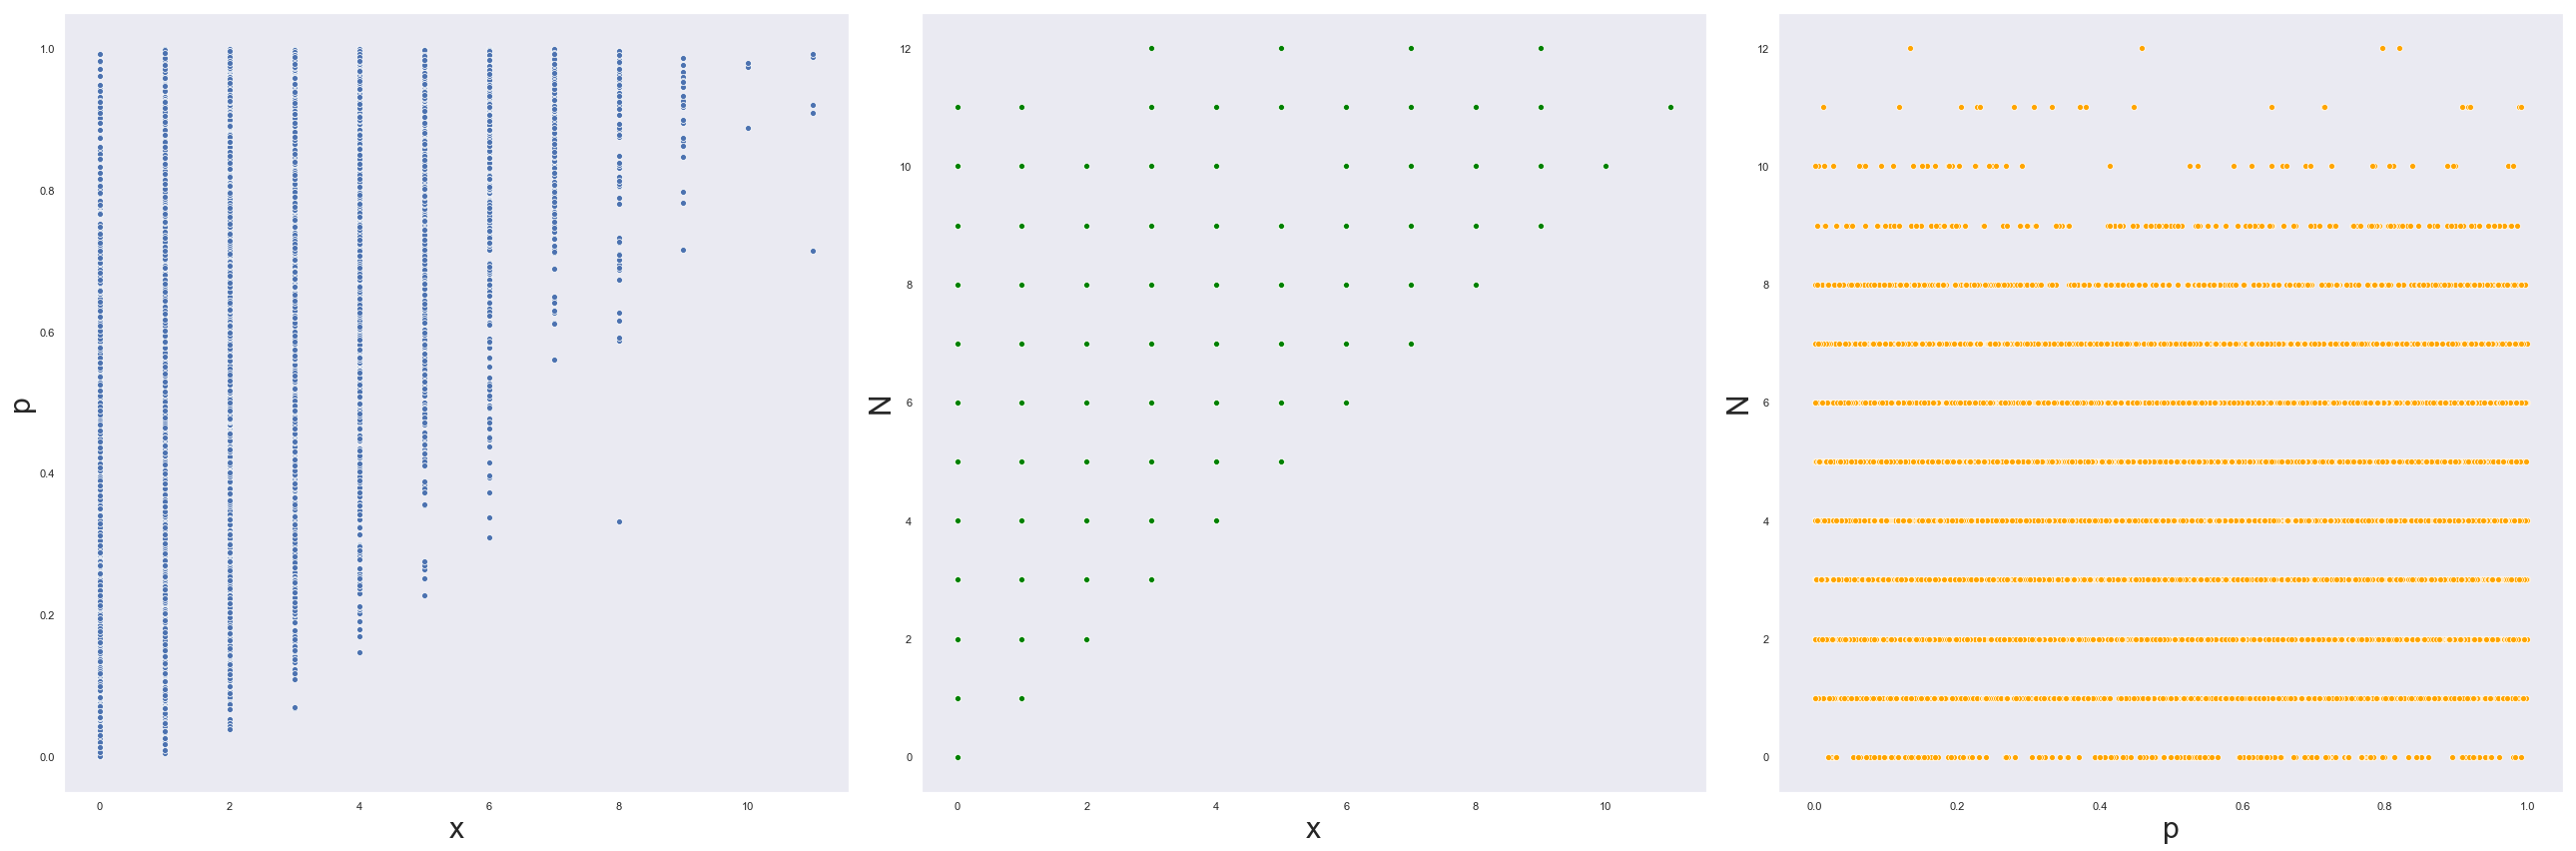

In [6]:
############ Q9 Three-dimensional Joint Distribution: Gibbs sampler ##############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

def gibbs_plot(x,p,n):
    # resdf=pd.DataFrame({'x':x, 'p':p, 'N':n})
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (36, 12))
    # fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
    ax1.grid()
    df1=pd.DataFrame({'x':x, 'p':p})
    sns.scatterplot(x="x", y="p",data=df1,ax=ax1)
    ax1.set_xlabel("x",fontsize=30)
    ax1.set_ylabel("p",fontsize=30)

    ax2.grid()
    df2=pd.DataFrame({'x':x, 'N':n})
    sns.scatterplot(x="x", y="N",data=df2,ax=ax2,color='green')
    ax2.set_xlabel("x",fontsize=30)
    ax2.set_ylabel("N",fontsize=30)

    ax3.grid()
    df3=pd.DataFrame({'p':p, 'N':n})
    sns.scatterplot(x="p", y="N",data=df3,color='orange')
    ax3.set_xlabel("p",fontsize=30)
    ax3.set_ylabel("N",fontsize=30)

    plt.tight_layout()
    plt.savefig('imgq9.jpg')
    plt.show()

def Gibbs_sampler(x,p,n):
    iter=10000
    for t in range(iter):
        x_next=np.random.binomial(n[t],p[t])
        p_next=np.random.beta(x_next+1,n[t]-x_next+1)
        z=np.random.poisson(4*(1-p_next))
        n_next=z+x_next
        x.append(x_next)
        p.append(p_next)
        n.append(n_next)

x0=1
p0=0.5
n0=2
x=[x0]
p=[p0]
n=[n0]
Gibbs_sampler(x,p,n)
gibbs_plot(x,p,n)

In [3]:
import random
import numpy as np
from collections import Counter
from math import exp
# coin that lands head with prob=a_{ij}
def coin(p):
    flip=random.random()
    if flip < p:
        return 1
    return 0
def ifindep(setX,alledge,choosev):
    relatev=[]
    for e in alledge:
        if e[0]==choosev:
            relatev.append(e[1])
        elif e[1]==choosev:
            relatev.append(e[0])
    ind=1
    for e in relatev:
        if e in setX:
            ind=0
    return ind

def legalstate(setX,alledge):
    for e in alledge:
        if setX[e[0]-1]==1 and setX[e[1]-1]==1:
            return 0
    return 1


def Discrete_MH(setX,alledge,lam):
    iters=1000
    maxsize=0
    maxset=[]
    convtime=1000
    for t in range(iters):
        choosev=np.random.randint(1,24)-1
        nstate=setX[:]
        nstate[choosev]=1-nstate[choosev]
        if legalstate(nstate,alledge)==1:
            aij=exp(2*Counter(nstate)[1]-Counter(setX)[1])
            if coin(aij)==1:
                setX=nstate
                if Counter(setX)[1]>maxsize:
                    maxsize=Counter(setX)[1]
                    maxset=setX[:]
                    convtime=t
    if maxsize!=9:
        convtime=1000
    return maxset,maxsize,convtime

def Continuous_MH(setX,alledge,lam,mu):
    # iters=1000
    timecost=1000
    convtime=1000
    # for t in range(iters):
    while timecost>0:
        lam=np.random.poisson(lam)+1
        timecost-=lam
        choosev=np.random.randint(1,24)
        if choosev in setX:
            aij=min(1,1/lam)
            if coin(aij)==1:
                setX.remove(choosev)
        else:
            if ifindep(setX,alledge,choosev)==1:
                aij=min(1,lam)
                if coin(aij)==1:
                    setX.append(choosev)
        if len(setX)==9 and convtime==1000:
            convtime=1000-timecost
    return setX,len(setX),convtime



lam=0.5
mu=0.5
vertice_num=24
edge_num=36
alledge=[]
for i in range(12):
    alledge.append([i+1,i+13])
for i in range(11):
    alledge.append([i+13,i+14])
alledge.append([24,13])
for i in range(12):
    endp=(i+5)%12
    if endp==0:
        endp=12
    alledge.append([i+1,endp])
X0=[1]
allsize=[]
allset=[]
allsizec=[]
allsetc=[]

ctime=[]
ctimc=[]

iters=2000
for t in range(iters):
    setX,setsize,convtime=Discrete_MH([0]*24,alledge,lam)
    setXc,setsizec,convtimec=Continuous_MH(X0,alledge,lam,mu)
    allsize.append(setsize)
    allsizec.append(setsizec)
    ctime.append(convtime)
    ctimc.append(convtimec)
print('Discrete\tsize of maximum independent set is ',max(allsize))
print('Continuous\tsize of maximum independent set is ',max(allsizec))
print('Discrete\tconverge time is ',np.mean(ctime))
print('Continuous\tconverge time is ',np.mean(ctimc))

Discrete	size of maximum independent set is  9
Continuous	size of maximum independent set is  9
Discrete	converge time is  572.7315
Continuous	converge time is  463.726
